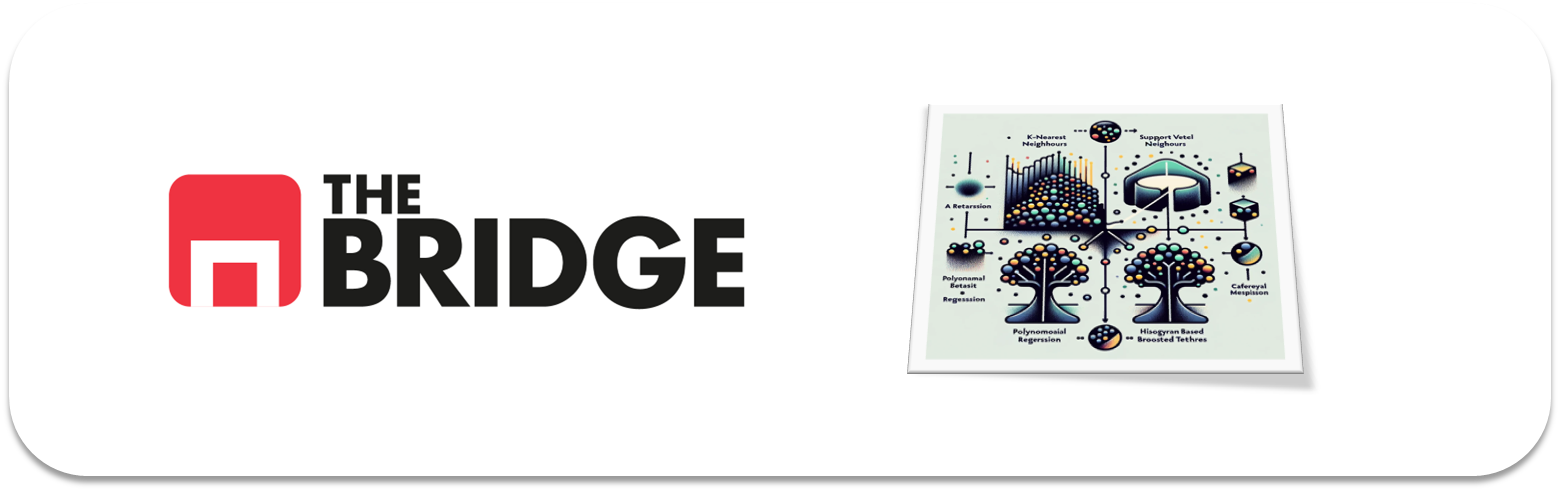

## PRACTICA OBLIGATORIA: **Otros Modelos Supervisados**

* La práctica obligatoria de esta unidad consiste en resolver un modelado de clasificación, incluyendo KNN entre los posibles modelos, y aplicando balanceado. Para ello utilizaremos un dataset que ya hemos empleado en los workout. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [36]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler

### #1. El problema y los datos

Vamos a volver al dataset con el que vimos la clasificación binaria con regresión logística, "Give me some credit", y nuestro objetivo es crear un modelo que nos permita predicir si una persona va a encontrarse en dificultades financieras en los dos próximos años. El dataset de partida lo puedes en contrar en el directorio data que acompaña al ejercicio. 

### #1.1
Cárgalo y, apoyándote en las herramientas y fuentes que consideres necesarias, haz una descripción textual de sus variables. Luego con ayuda de los datos, haz una clasificación inicial de sus variables en categóricas y numéricas.

In [4]:
df = pd.read_csv('data/credit_npo.csv')

df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.081892,37,0,0.070709,5656.0,12,1,0,0,0.0
1,0,0.023413,74,0,0.209197,4870.0,9,0,1,0,0.0
2,0,0.000000,43,0,0.080784,5000.0,2,0,0,0,2.0
3,0,0.492754,44,0,0.412735,7333.0,4,0,2,0,3.0
4,0,1.000000,63,0,0.000000,8333.0,3,0,0,0,1.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

- SeriousDlqin2yrs: si el cliente lleva más de 2 años sin pagar, que es cuando vamos a considerar que ha caido en inmpago 
- RevolvingUtilizationOfUnsecuredLines: utilización del crédito renovable en líneas de crédito no aseguradas
- age: edad del cliente
- NumberOfTime30-59DaysPastDueNotWorse: veces que el cliente se ha demorado entre 30 y 59 días en pagar
- DebtRatio: ratio de deuda
- MonthlyIncome:ingresos mensuales del cliente
- NumberOfOpenCreditLinesAndLoans: número de deudas abiertas  
- NumberOfTimes90DaysLate: veces que se ha retrasado más de 90 días en pagar
- NumberRealEstateLoansOrLines: número de préstamos en bienes inmobiliarios 
- NumberOfTime60-89DaysPastDueNotWorse: veces que el cliente se ha demorado entre 60 y 89 días en pagar
- NumberOfDependents: personas a cargo del cliente

In [39]:
df.dropna(axis=0, inplace=True)

In [29]:
df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [30]:
# en este caso decidimos que todas sean numéricas
features_num = ['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents']

(10, 2)


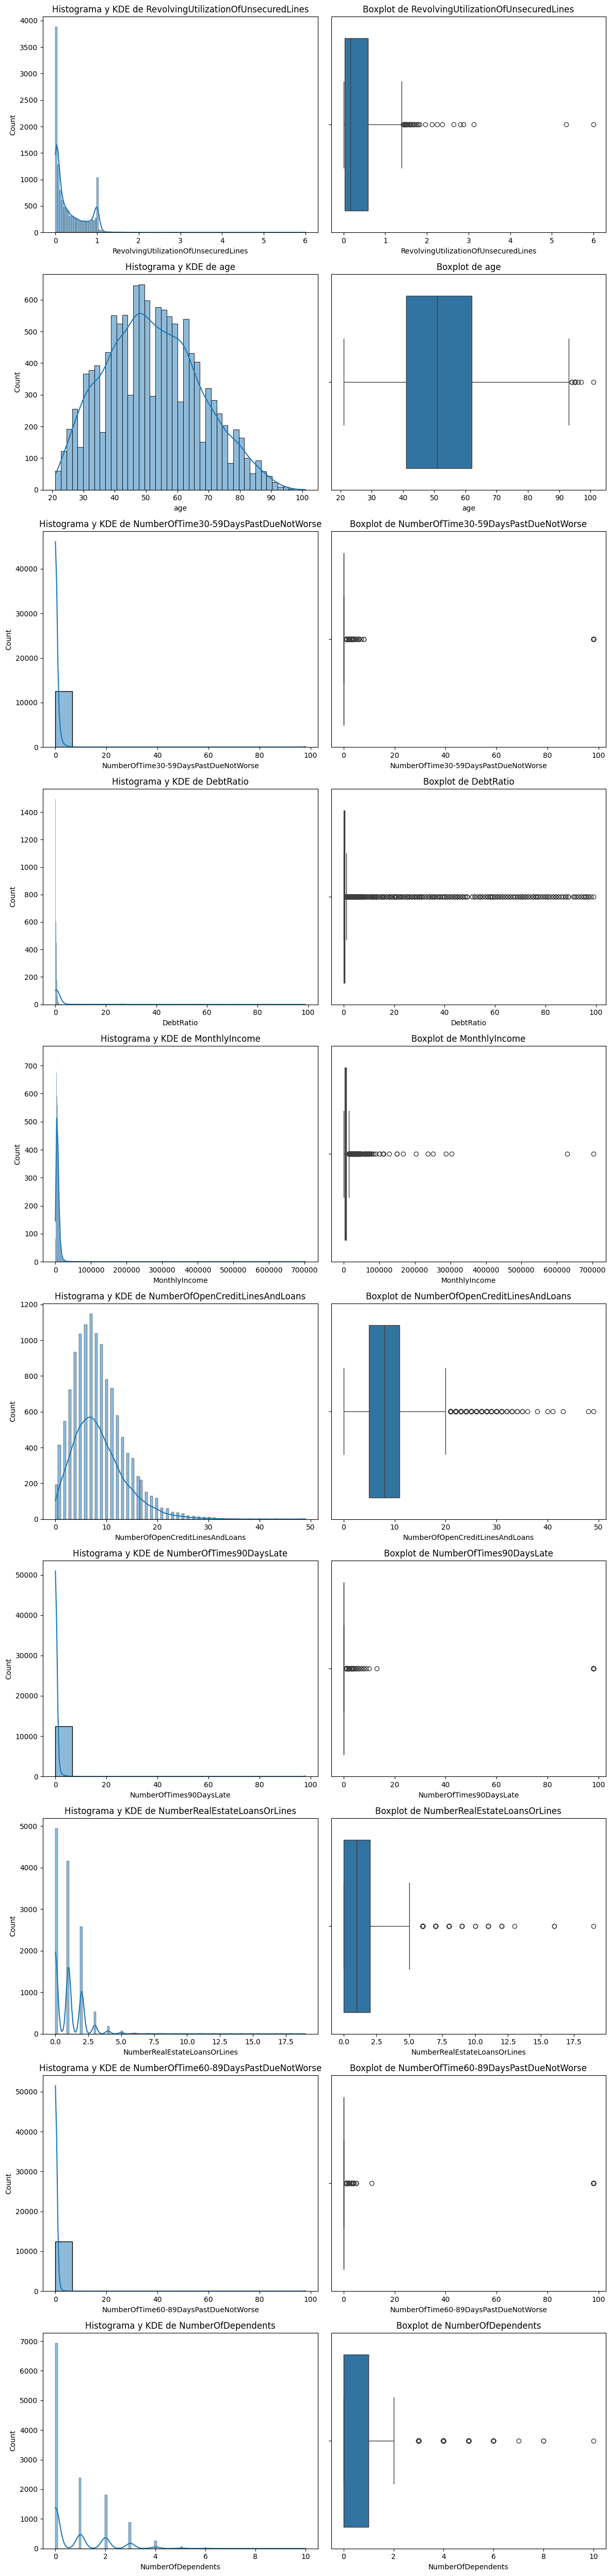

In [32]:
plot_combined_graphs(df, features_num)

<!-- ### #1.2
¿Qué tipo de problema estamos tratando? ¿Cuál es la variable target? -->

Problema de clasificación en el que la variable target es 'SeriousDlqin2yrs'

In [11]:
target = 'SeriousDlqin2yrs'

### #1.3
Pinta la distribución de frecuencias del target y coméntala

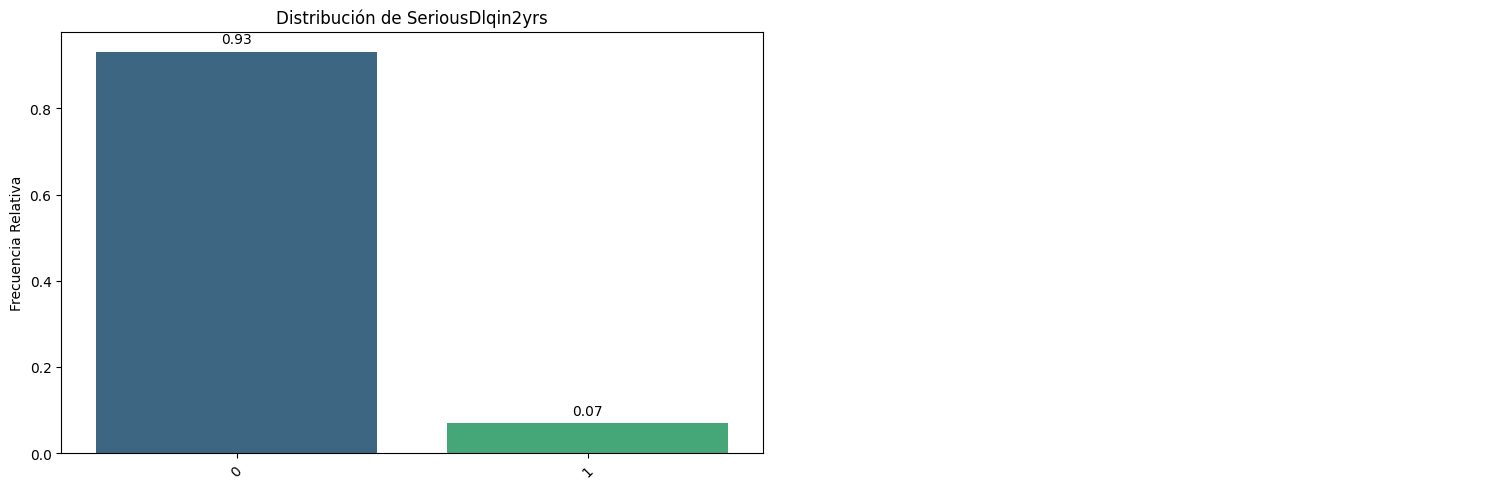

In [13]:
from bootcampviztools import  *
pinta_distribucion_categoricas(df, [target], True, True)

Es una columna target muy desequilibrada, lo que empobrecerá el modelo, por lo que es conveniente que la equilibremos antes de entrenar los modelos

### #2 Modelado

Realiza un proceso completo de modelado hasta dar con el mejor modelo de los que hayas escogido (emplea al menos 3, y uno tiene que ser KNN). Aplica las técnicas que creas necesarias para obtener el mejor resultado (suponiendo que este después de hablar con el negocio es el recall medio, para tener un compromiso entre las dos clases). Para comparar modelos emplea validación cruzada antes de optimización y luego ajusta los hiperparámetros del mejor modelo. Evalúa este y haz un pequeño análisis de errores.

In [35]:
df[target].value_counts(True)

SeriousDlqin2yrs
0    0.931084
1    0.068916
Name: proportion, dtype: float64

In [40]:
train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [41]:
from sklearn.utils import resample

In [42]:
# Separar las clases mayoritaria y minoritaria
clase_mayoritaria = X_train[y_train == 0]
clase_minoritaria = X_train[y_train == 1]

# Bajomuestrear la clase mayoritaria
clase_mayoritaria_bajomuestreo = resample(clase_mayoritaria,
                                          replace=False,
                                          n_samples=len(clase_minoritaria),  # igual al número de la clase minoritaria
                                          random_state=42)

# Combinar la clase minoritaria con la clase mayoritaria bajomuestreada (importante es que resample mantiene los índices para que lo que viene a continuación tenga sentido)
X_train = pd.concat([clase_mayoritaria_bajomuestreo, clase_minoritaria])
y_train = pd.concat([y_train.loc[clase_mayoritaria_bajomuestreo.index], 
                                  y_train.loc[clase_minoritaria.index]])

In [43]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= features_num)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = features_num)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


model_names = ["Logistic Regression","KNN","Random Forest"]
lr_clf = LogisticRegression(max_iter = 5000)
knn = KNeighborsClassifier(n_neighbors=10)
rf_clf = RandomForestClassifier(random_state= 42)


model_set = [lr_clf, knn, rf_clf]

In [53]:
metricas_cv = {}
valores = []
for nombre,modelo in zip(model_names, model_set):
    print(modelo)
    if nombre != "Logistic Regression":
        metricas_cv[nombre] = cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "accuracy")
    else:
        metricas_cv[nombre] = cross_val_score(modelo, X_train_scaled, y_train, cv = 5, scoring = "accuracy")
    valores.append(np.mean(metricas_cv[nombre]))
ganador = list(metricas_cv.keys())[np.argmax(valores)]

LogisticRegression(max_iter=5000)
KNeighborsClassifier(n_neighbors=10)
RandomForestClassifier(random_state=42)


In [54]:
for model_name, valores in metricas_cv.items():
    print(f"Model <{model_name}>, Accuracy_CV: {np.mean(valores)}")
print(f"El ganador es {ganador}")

Model <Logistic Regression>, Accuracy_CV: 0.7601532132217337
Model <KNN>, Accuracy_CV: 0.5437565612143567
Model <Random Forest>, Accuracy_CV: 0.7578918995602213
El ganador es Logistic Regression


In [62]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet", None],  # Tipo de regularización
    "C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Inverso de la regularización (entre más alto, menos regularización)
}

lr_grid = GridSearchCV(lr_clf,
                       param_grid= param_grid,
                       cv = 3,
                       scoring = "recall_macro",
                       n_jobs = -1)

lr_grid.fit(X_train, y_train)

c:\Users\Eva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
42 fits failed out of a total of 84.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Eva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Eva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\Eva\AppData\Local\

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=5000), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='recall_macro')

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      2197
           1       0.22      0.73      0.33       167

    accuracy                           0.79      2364
   macro avg       0.60      0.76      0.61      2364
weighted avg       0.92      0.79      0.84      2364



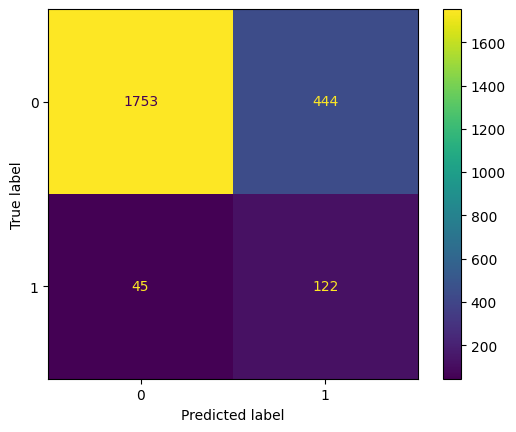

In [63]:
y_pred = lr_grid.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

De entre las 2364 instancias, lo más remarcable desde el punto de vista de negocio, es que ha habido 45 personas que 'se nos han escapado', es decir, que dijimos que no serían morosos pero en realidad sí lo eran. El recall de la clase positiva es de un 73%, con lo cual hay algo de margen de mejora

La tendencia es hacia pasarme penalizando clientes, cuando en realidad no había motivo, lo cual ha de evaluarse el coste o perjuicio que podría suponer para la entidad bancaria. Si este es perfectamente asumible con respecto a la pérdida de deudas que supone los positivos no capturados, podríamos estar ante un buen modelo.

Igualmente sería aconsejable probar más modelos con el objetivo de encontrar uno que mejore estas métricas.